In [13]:
class Pixel(object):

    def __init__(self, red=0, green=0, blue=0, alpha=None):
        self.red = red
        self.green = green
        self.blue = blue
        self.alpha = alpha

In [16]:
class OctreeNode(object):
    
    def __init__(self, nivel, padre):
        self.Pixel = Pixel(0, 0, 0)
        self.pixel_count = 0
        self.children = [None for _ in range(8)]
        
        if nivel < OctreeQuantizer.MAX_PROFUNDIDAD - 1:
            padre.add_nivel_node(nivel, self)

    def is_leaf(self):
        
        return self.pixel_count > 0

    def get_nodes_pixel_count(self):
        sum_count = self.pixel_count
        for i in range(8):
            node = self.children[i]
            if node:
                sum_count += node.pixel_count
        return sum_count

    def add_Pixel(self, Pixel, nivel, padre):
        
        if nivel >= OctreeQuantizer.MAX_PROFUNDIDAD:
            self.Pixel.red += Pixel.red
            self.Pixel.green += Pixel.green
            self.Pixel.blue += Pixel.blue
            self.pixel_count += 1
            return
        index = self.get_Pixel_index_for_nivel(Pixel, nivel)
        if not self.children[index]:
            self.children[index] = OctreeNode(nivel, padre)
        self.children[index].add_Pixel(Pixel, nivel + 1, padre)
    
    def get_Pixel_index_for_nivel(self, Pixel, nivel):
        
        index = 0
        mask = 0x80 >> nivel
        if Pixel.red & mask:
            index |= 4
        if Pixel.green & mask:
            index |= 2
        if Pixel.blue & mask:
            index |= 1
        return index

class OctreeQuantizer(object):

    MAX_PROFUNDIDAD = 8

    def __init__(self):
    
        self.niveles = {i: [] for i in range(OctreeQuantizer.MAX_PROFUNDIDAD)}
        self.root = OctreeNode(0, self)

    def get_leaves(self):
        return [node for node in self.root.get_leaf_nodes()]

    def add_nivel_node(self, nivel, node):
        self.niveles[nivel].append(node)

    def fill(self, Pixel):
        self.root.add_Pixel(Pixel, 0, self)

    

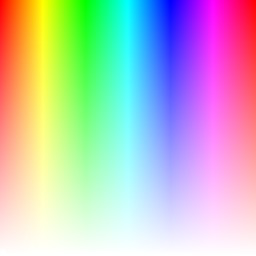

In [17]:
from PIL import Image

def main():
    image = Image.open('image.png')
    pixels = image.load()
    width, height = image.size
    
    display(image)

    octree = OctreeQuantizer()

    for j in range(height):
        for i in range(width):
            octree.fill(Pixel(*pixels[i, j]))

if __name__ == '__main__':
    main()
